In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def load_and_describe_data(customers_path, products_path, transactions_path):
    try:
        customers_df = pd.read_csv("Customers.csv")  
        products_df = pd.read_csv("Products.csv")  
        transactions_df = pd.read_csv("Transactions.csv") 
        
        # Converting date columns to datetime
        customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
        
        print("\n=== Basic Data Overview ===")
        
        print("\nCustomers Dataset:")
        print(f"Number of customers: {len(customers_df)}")
        print("\nCustomers by Region:")
        print(customers_df['Region'].value_counts())
        
        print("\nProducts Dataset:")
        print(f"Number of products: {len(products_df)}")
        print("\nProducts by Category:")
        print(products_df['Category'].value_counts())
        
        print("\nTransactions Dataset:")
        print(f"Number of transactions: {len(transactions_df)}")
        print(f"Total revenue: ${transactions_df['TotalValue'].sum():,.2f}")
        print(f"Average transaction value: ${transactions_df['TotalValue'].mean():,.2f}")
        
        return customers_df, products_df, transactions_df
    
    except FileNotFoundError as e:
        print(f"Error: Could not find one or more data files. Please check the file paths.\n{e}")
        return None, None, None
    except Exception as e:
        print(f"An error occurred while loading the data: {e}")
        return None, None, None

def plot_basic_insights(customers_df, products_df, transactions_df):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Customer Distribution by Region
    customers_df['Region'].value_counts().plot(kind='bar', ax=ax1)
    ax1.set_title('Customer Distribution by Region')
    ax1.set_xlabel('Region')
    ax1.set_ylabel('Number of Customers')
    
    # 2. Product Categories
    products_df['Category'].value_counts().plot(kind='bar', ax=ax2)
    ax2.set_title('Products by Category')
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Number of Products')
    
    # 3. Price Distribution
    products_df['Price'].hist(bins=30, ax=ax3)
    ax3.set_title('Product Price Distribution')
    ax3.set_xlabel('Price')
    ax3.set_ylabel('Frequency')
    
    # 4. Monthly Transactions
    monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
    monthly_sales.plot(ax=ax4)
    ax4.set_title('Monthly Sales')
    ax4.set_xlabel('Month')
    ax4.set_ylabel('Total Sales')
    
    plt.tight_layout()
    plt.show()


=== Basic Data Overview ===

Customers Dataset:
Number of customers: 200

Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Products Dataset:
Number of products: 100

Products by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Transactions Dataset:
Number of transactions: 1000
Total revenue: $689,995.56
Average transaction value: $690.00


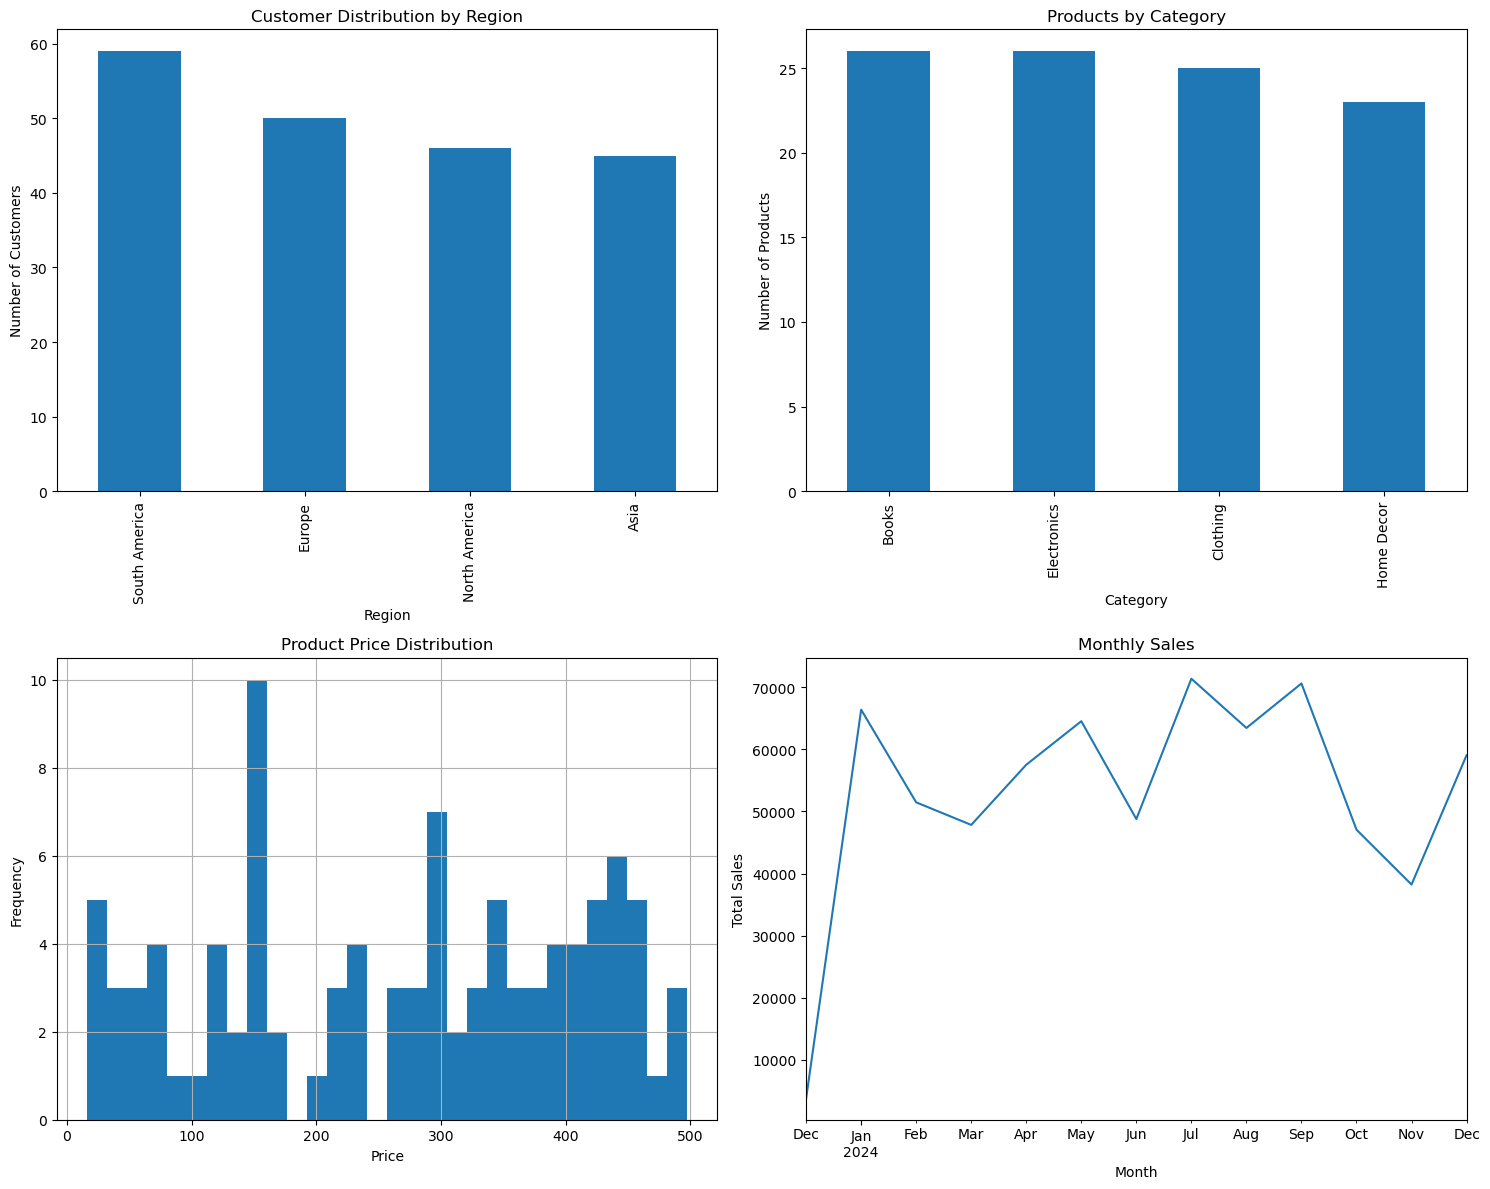

In [3]:
customers_df, products_df, transactions_df = load_and_describe_data(
    'Customers.csv',
    'Products.csv',
    'Transactions.csv'
)
if customers_df is not None:
    plot_basic_insights(customers_df, products_df, transactions_df)

In [4]:
# 1. Finding top selling product categories
top_categories = transactions_df.merge(products_df, on="ProductID").groupby("Category")["Quantity"].sum().sort_values(ascending=False).head(5)

print("Top 5 Selling Categories:\n", top_categories)

# 2. Customer Regional Analysis
def analyze_regional_revenue():
    regional_revenue = (
        transactions_df.merge(customers_df, on="CustomerID")
        .groupby("Region")
        .agg({
            "TotalValue": ["sum", "mean"],
            "TransactionID": "count"
        })
    )
    regional_revenue.columns = ["Total Revenue", "Avg Transaction Value", "Number of Transactions"]
    return regional_revenue.sort_values("Total Revenue", ascending=False)

# 3. Customer Purchase Frequency
def analyze_customer_frequency():
    customer_frequency = (
        transactions_df.groupby("CustomerID")
        .agg({
            "TransactionID": "count",
            "TotalValue": "sum"
        })
        .describe()
    )
    return customer_frequency

# 4. Time-based Analysis
def analyze_monthly_trends():
    monthly_sales = (
        transactions_df
        .set_index("TransactionDate")
        .resample("M")["TotalValue"]
        .sum()
        .sort_values(ascending=False)
        .head()
    )
    return monthly_sales

# 5. Price Range Analysis
def analyze_price_effectiveness():
    
    products_df['PriceRange'] = pd.qcut(products_df['Price'], q=4, labels=['Budget', 'Economy', 'Premium', 'Luxury'])
    
    price_range_performance = (
        transactions_df.merge(products_df, on="ProductID")
        .groupby("PriceRange")
        .agg({
            "TotalValue": "sum",
            "Quantity": "sum",
            "TransactionID": "count"
        })
    )
    price_range_performance.columns = ["Total Revenue", "Units Sold", "Number of Transactions"]
    return price_range_performance


print("Regional Revenue Analysis:\n")
print(analyze_regional_revenue())
print("\nCustomer Purchase Frequency Stats:\n")
print(analyze_customer_frequency())
print("\nTop Performing Months:\n")
print(analyze_monthly_trends())
print("\nPrice Range Performance:\n")
print(analyze_price_effectiveness())

Top 5 Selling Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64
Regional Revenue Analysis:

               Total Revenue  Avg Transaction Value  Number of Transactions
Region                                                                     
South America      219352.56             721.554474                     304
Europe             166254.63             710.489872                     234
North America      152313.40             624.235246                     244
Asia               152074.97             697.591606                     218

Customer Purchase Frequency Stats:

       TransactionID    TotalValue
count     199.000000    199.000000
mean        5.025126   3467.314372
std         2.198340   1832.677958
min         1.000000     82.360000
25%         3.000000   2162.040000
50%         5.000000   3137.660000
75%         6.000000   4770.225000
max        11.000000  10673.870000

Top Performing Months:

/var/folders/dn/4rnkn7sd3535g2xjq5ckq9vc0000gn/T/ipykernel_1412/3329126734.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("PriceRange")
